# Import libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("cleaned-dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Label
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


# Exploration data analysis

## 1. Correlation between words and email labels

In [3]:
# Calculate correlation coefficients between each word and the target variable
correlations = df.corr()['Label'].sort_values()

# Top 10 words most strongly associated with spam emails
top_spam = correlations[1:].tail(10)
print("Top 10 words most strongly associated with spam emails:")
print(top_spam)

# Top 10 words most strongly associated with not-spam emails
top_not_spam = correlations[1:].head(10)
print("Top 10 words most strongly associated with not-spam emails:")
print(top_not_spam)

Top 10 words most strongly associated with spam emails:
soft     0.213382
money    0.217215
sec      0.217402
sex      0.220092
ur       0.220253
best     0.221703
able     0.222219
our      0.228187
more     0.258152
Label    1.000000
Name: Label, dtype: float64
Top 10 words most strongly associated with not-spam emails:
hpl         -0.266518
hanks       -0.266070
thank       -0.262384
attached    -0.236558
daren       -0.236180
forwarded   -0.230765
subject     -0.227754
hp          -0.225846
aren        -0.206063
nom         -0.202600
Name: Label, dtype: float64


The top 10 words most strongly associated with spam emails, in order of highest correlation coefficient, are: more, our, able, best, ur, sex, sec, money, and soft. The strongest word association with the spam label is the word "more", followed closely by "our" and "able". These words may be common in spam emails because they are often used to make false claims or offer something of value in exchange for personal information or money.

On the other hand, the top 10 words most strongly associated with not-spam emails, in order of highest negative correlation coefficient, are: hpl, hanks, thank, attached, daren, forwarded, subject, hp, aren, and nom. The strongest word association with the not-spam label is the word "hpl", followed by "hanks" and "thank". These words may be common in not-spam emails because they are often used in professional or formal communications.

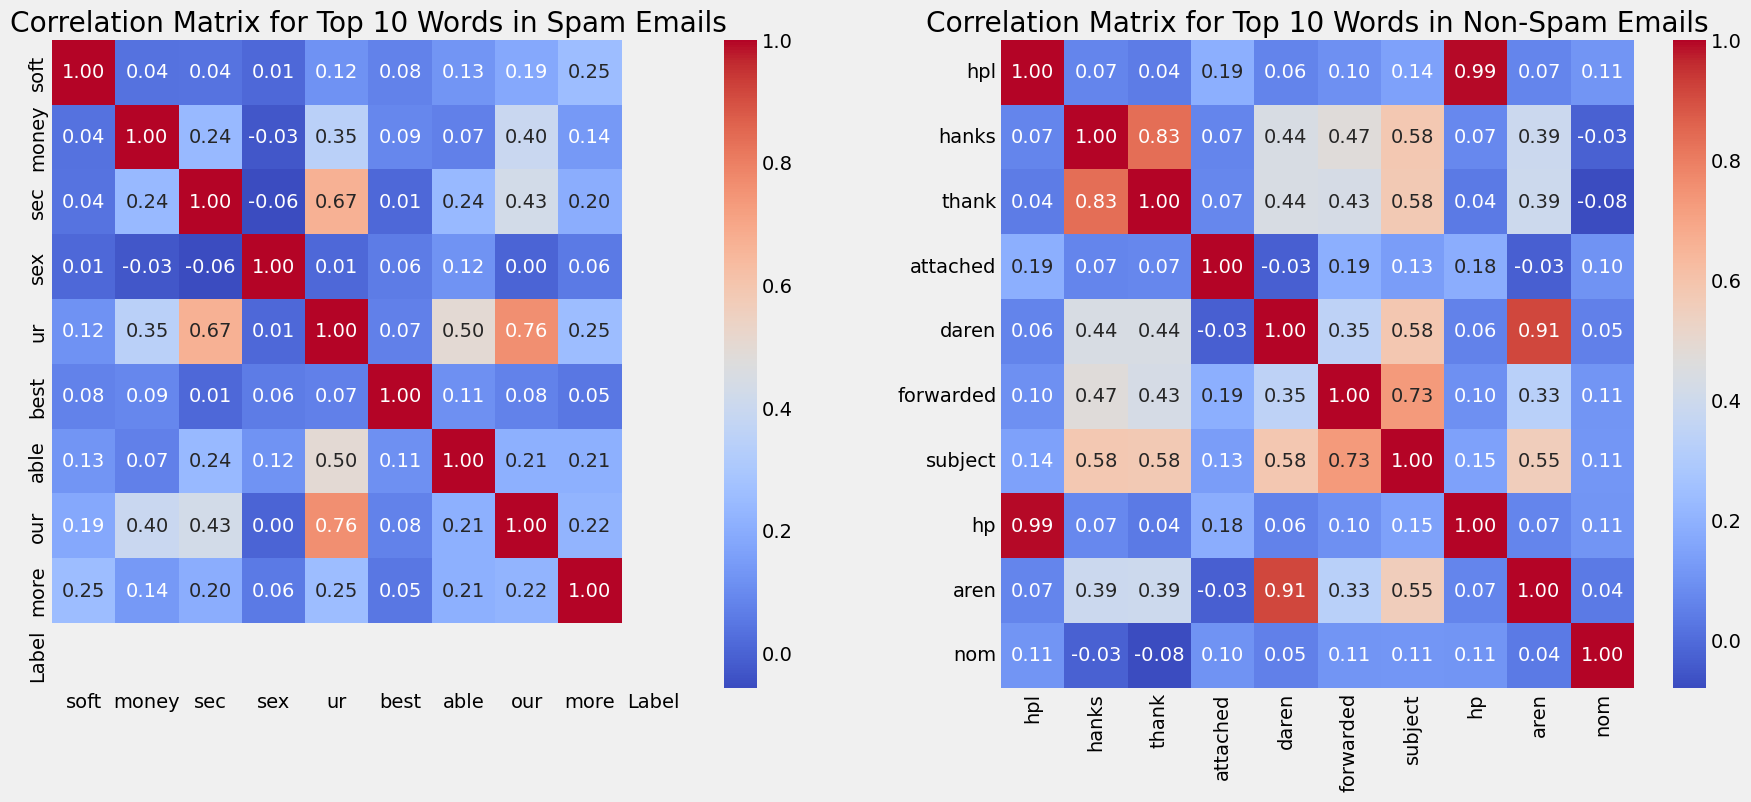

In [4]:
# Create separate dataframes for spam and non-spam emails
spam_df = df[df['Label'] == 1][top_spam.index]
not_spam_df = df[df['Label'] == 0][top_not_spam.index]

# Calculate correlation matrices for spam and non-spam emails
spam_corr = spam_df.corr()
not_spam_corr = not_spam_df.corr()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
sb.heatmap(spam_corr, cmap="coolwarm", annot=True, fmt='.2f', ax=ax1)
ax1.set_title("Correlation Matrix for Top 10 Words in Spam Emails")
sb.heatmap(not_spam_corr, cmap="coolwarm", annot=True, fmt='.2f', ax=ax2)
ax2.set_title("Correlation Matrix for Top 10 Words in Non-Spam Emails")
plt.show()

Analyzing the correlation matrices for the top 10 words in spam and non-spam emails, we can observe some interesting patterns.

In the spam email matrix, we can see that some words are highly correlated. For instance, `our` and `ur` have a correlation coefficient of 0.76, followed by `ur` and `sec` with 0.67. Additionally, `able` and `ur` have a correlation of 0.50, and `money` and `our` have a correlation of 0.40. Surprisingly, `sex` has almost no correlation with other words except for a slight negative correlation with `money` and `sec`.

On the other hand, the non-spam email matrix shows much higher correlations between words. Some of these correlations are expected, such as `hp` and `hpl` with a coefficient of 0.99, `hanks` and `thanks` with 0.83, and `forwarded` and `subject` with 0.73. These findings indicate that non-spam emails tend to use words in a more structured and cohesive manner compared to spam emails.

##  2. Distribution of label classes

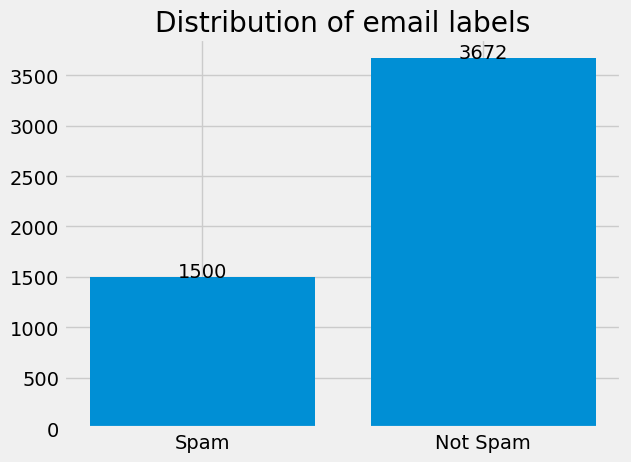

In [5]:
spam_count = (df['Label'] == 1).sum()
not_spam_count = (df['Label'] == 0).sum()

plt.bar(['Spam', 'Not Spam'], [spam_count, not_spam_count])
plt.title('Distribution of email labels')
for i, v in enumerate([spam_count, not_spam_count]):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()

In this dataset, there is 3672 non-spam emaild and 1500 spam emails. This indicates that the dataset is imbalanced because the number of non-spam emails is significantly higher than the number of spam emails. Therefore, the model may have better performance on non-spam emails but may not perform well on spam emails.

In the end, we have used oversampling techniques to solve this problem. 

## 3. Word frequency in spam and not-spam emails

In [6]:
spam_words = df.loc[df['Label'] == 1].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in spam emails:")
for word, count in spam_words.items():
    print(f"{word}: {count}")

not_spam_words = df.loc[df['Label'] == 0].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in non-spam emails:")
for word, count in not_spam_words.items():
    print(f"{word}: {count}")


Top 10 words with highest frequency in spam emails:
e: 151062
t: 109878
a: 105425
o: 103997
i: 100761
n: 90840
r: 89645
s: 83720
l: 58852
c: 54181

Top 10 words with highest frequency in non-spam emails:
e: 287499
t: 202913
a: 181711
o: 180973
n: 157937
r: 145229
i: 136416
s: 132531
l: 101465
c: 100509


The frequency of the top 10 most common words in both spam and not-spam emails were also calculated. The results show that the most common words in both types of emails are similar, with "e", "t", "a", "o", "n", "r", "i", "s", "l", and "c" being the top 10 in both cases, though their frequencies are higher in not-spam emails.

It is worth noting that while the frequency of these common words may not be particularly informative in distinguishing between spam and not-spam emails on their own, they could be useful in combination with other features in a machine learning model. For example, the presence or absence of these common words could be used in combination with the top 10 words most strongly associated with either label to improve the accuracy of email classification models.

## 4. Distribution of word frequency

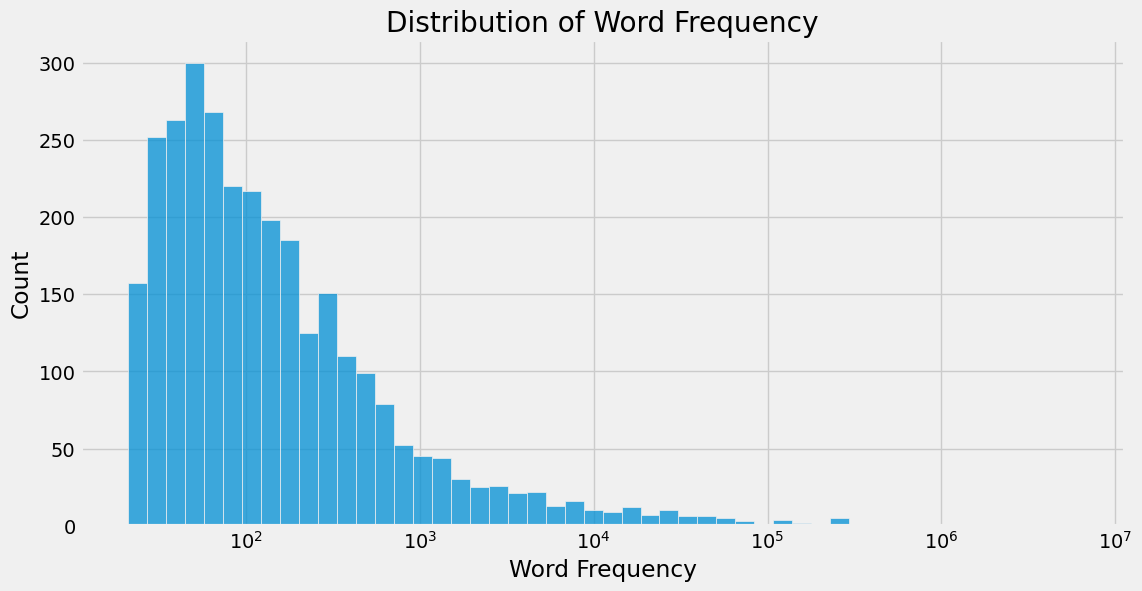

In [12]:
# Calculate the frequency of each word
word_counts = df.iloc[:, :-1].sum().sort_values(ascending=False)

# Create a histogram of the word frequencies
plt.figure(figsize=(12, 6))
sb.histplot(word_counts, log_scale=True, bins=50)
plt.xlabel("Word Frequency")
plt.ylabel("Count")
plt.title("Distribution of Word Frequency")

plt.show()

## 5. Distribution of Email Length 

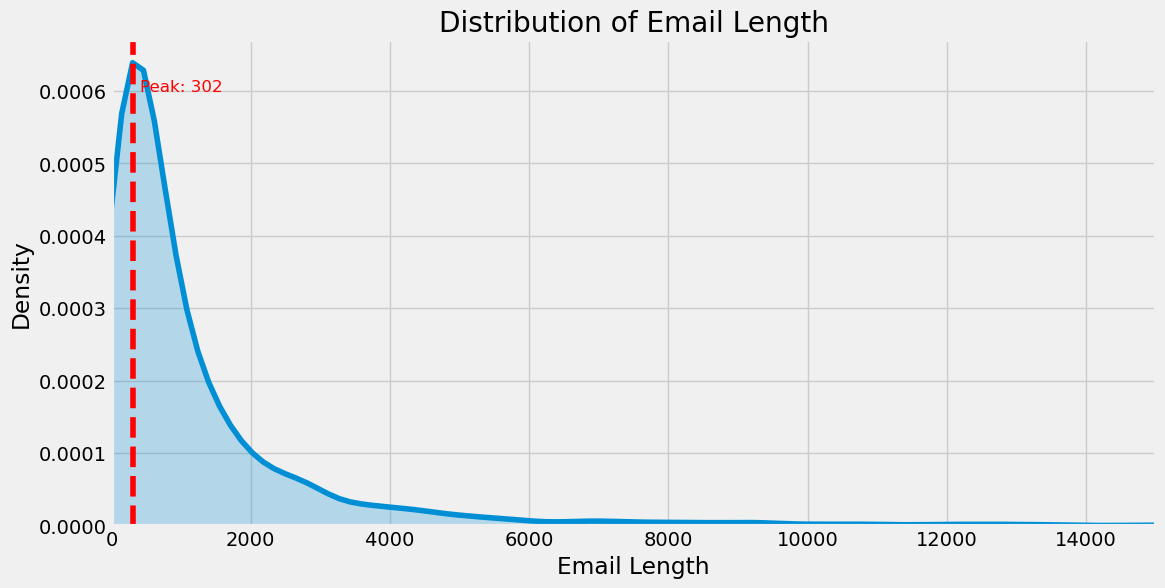

In [8]:
email_lengths = df.iloc[:, :-1].sum(axis=1)

plt.figure(figsize=(12, 6))
sb.kdeplot(email_lengths, shade=True)
plt.xlabel("Email Length")
plt.title("Distribution of Email Length")
plt.xlim(0, 15000)

# Find the peak of the density plot
density = sb.kdeplot(email_lengths).get_lines()[0].get_data()
x_peak = density[0][density[1].argmax()]
y_peak = density[1].max()

# Add a vertical line to the plot to indicate the peak
plt.axvline(x_peak, color='red', linestyle='--')
plt.text(x_peak+100, y_peak-0.00004, f"Peak: {int(x_peak)}", color='red', fontsize=12)

plt.show()

Based on the peak at 302, it appears that a significant number of emails in the dataset have a length of around 300 words. This could suggest that many emails in the dataset are concise and to the point, with fewer unnecessary or extraneous words. Additionally, the fact that the density plot has a long tail towards the right indicates that there are some emails in the dataset that are significantly longer than the majority. This could indicate that there are certain emails in the dataset that are more complex or detailed, and may require more attention or analysis. Overall, the distribution of email length suggests that there is a wide range of variability in email length in the dataset, with many emails being relatively short and concise, but with some longer and more complex emails as well.

## 6. Distribution of Email Length by Label

Peak of spam email length distribution:  8
Peak of not-spam email length distribution:  87


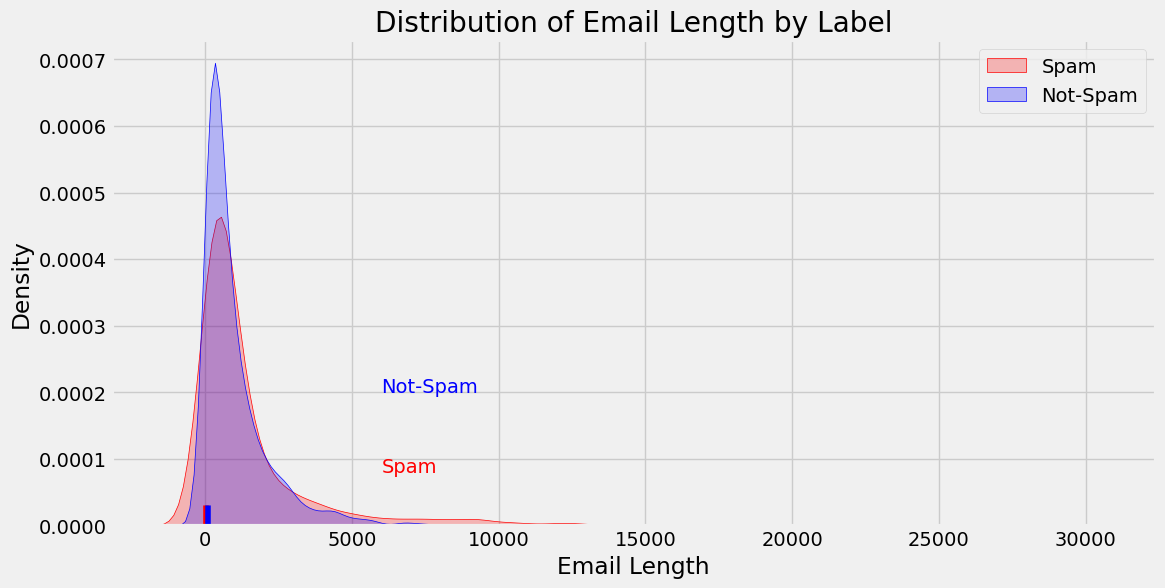

In [9]:
spam_lengths = df[df['Label'] == 1].iloc[:, :-1].sum(axis=1)
not_spam_lengths = df[df['Label'] == 0].iloc[:, :-1].sum(axis=1)

# Calculate peak for each distribution
spam_peak = spam_lengths.value_counts().idxmax()
not_spam_peak = not_spam_lengths.value_counts().idxmax()

# Print peaks
print("Peak of spam email length distribution: ", spam_peak)
print("Peak of not-spam email length distribution: ", not_spam_peak)

# Density plot
plt.figure(figsize=(12, 6))
sb.kdeplot(spam_lengths, shade=True, color='red', label='Spam')
sb.kdeplot(not_spam_lengths, shade=True, color='blue', label='Not-Spam')

# Add vertical lines for peaks
plt.axvline(spam_peak, color='red', linestyle='--', ymax=0.05)
plt.axvline(not_spam_peak, color='blue', linestyle='--', ymax=0.05)

plt.xlabel("Email Length")
plt.title("Distribution of Email Length by Label")
plt.annotate('Spam', xy=(6000, 0.00008), color='red')
plt.annotate('Not-Spam', xy=(6000, 0.0002), color='blue')
plt.legend()
plt.show()

From the plot, we can see that the distributions of email length for spam and non-spam emails have some overlap, but there are also some noticeable differences. Non-spam emails generally have a higher peak and a shorter tail. In contrast, spam emails have a longer length, with a lower peak and a longer tail.

We can also see that the number of non-spam emails is much higher than the number of spam emails, as indicated by the larger area under the non-spam curve. This is not surprising, as non-spam emails are typically more common in our inboxes.

Overall, this plot suggests that email length could be a useful feature for distinguishing between spam and non-spam emails, as there are clear differences in the distribution of email lengths between the two categories.

## 7. Distribution of Email Length by Word Frequency Quartiles

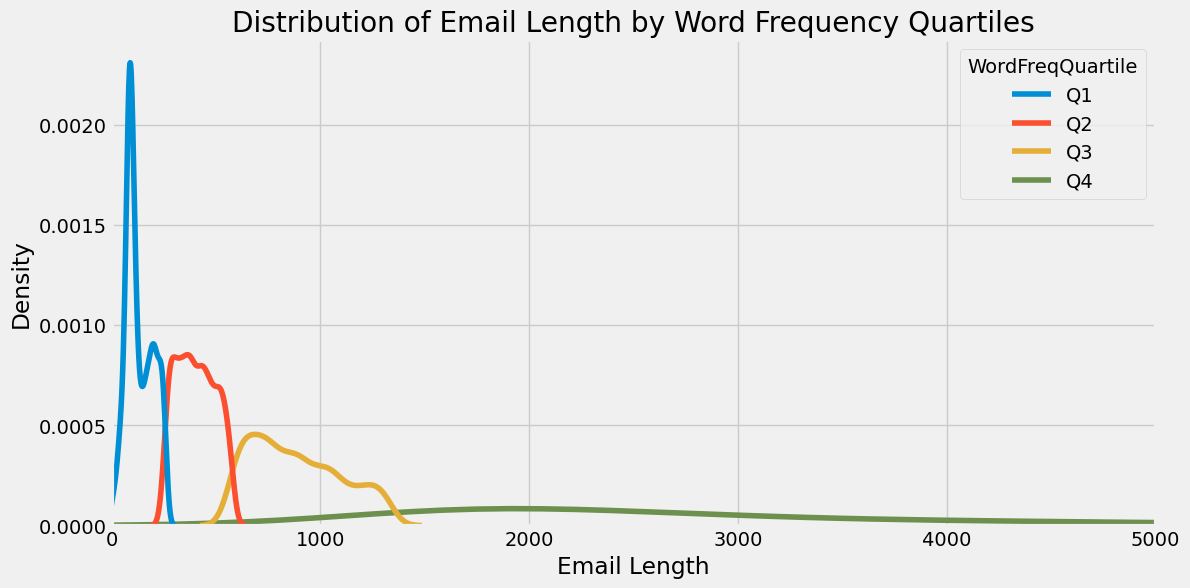

In [10]:
df_copy = df
df_copy['EmailLength'] = df.iloc[:, :-1].sum(axis=1)
# Compute the total word frequency for each email
word_freq = df.iloc[:, :-1].sum(axis=1)

# Divide the emails into quartiles based on word frequency
quartiles = pd.qcut(word_freq, q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Create a new column in the DataFrame to store the quartile information
df["WordFreqQuartile"] = quartiles

# Plot the distribution of email lengths within each quartile
plt.figure(figsize=(12, 6))
sb.kdeplot(data=df, x="EmailLength", hue="WordFreqQuartile")
plt.xlabel("Email Length")
plt.title("Distribution of Email Length by Word Frequency Quartiles")
plt.xlim(0, 5000)
plt.show()

 From the graph, we can see that the emails with the highest word frequency tend to have a longer length compared to those with lower word frequency.

Additionally, we can see that the distribution of email lengths becomes wider and more spread out as the word frequency increases. This suggests that emails with higher word frequency are more likely to have a wider range of lengths.

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

spam_stopwords = sum(df.loc[df['Label'] == 1].iloc[:, 1:-1].sum().loc[list(stop_words)])
not_spam_stopwords = sum(df.loc[df['Label'] == 0].iloc[:, 1:-1].sum().loc[list(stop_words)])

plt.bar(['Spam', 'Non-Spam'], [spam_stopwords, not_spam_stopwords])
plt.title('Stopword Analysis')
plt.xlabel('Email Type')
plt.ylabel('Stopword Count')
plt.show()